# IE30301 DataMining Programming HW1

Type your name and student ID here. Do not share this Jupyter Script online.

### NAME: Elkhan Ismayilzada
### Student Number: 20182010

---

### Import Packages
- Do not use packages specified other than below
- However, it is not nessasary to use all the packages below 
- For task 1.6, you need to use the package 'statsmodel.api'
- Both packages('sklearn.linear_model' and 'statsmodels.api') can be used to load linear regression model

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

## Task 1. Multiple linear regression [15 points]

#### 1.1 Load Dataset [1 points]

In [32]:
data = pd.read_csv("diabetes.csv")

#### 1.2 Split Dataset into the train & test set [1 points]
- You have to use the specified random seed when dividing the dataset using the function 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [33]:
x = data.drop("target",axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### 1.3 Load model and train the model [2 points]
- Intercept term should be included for training

In [34]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)
model = model.fit()

#### 1.4 Predict and evaluate the model [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [35]:
# predict 
x_test = sm.add_constant(x_test)
y_hat = model.predict(x_test)

In [36]:
# calculate MSE 
mse = np.sum(np.square(y_test-y_hat))/len(y_hat)

In [37]:
# write calculated MSE value here 
print(mse)

3097.1461383877945


In [38]:
# calculate R2
sse = np.sum(np.square(y_test-y_hat))
sst = np.sum(np.square(y_test-np.mean(y_test)))
r_square = 1-sse/sst

In [39]:
# write calculated R2 score here 
print(r_square)

0.3928939845074765


#### 1.5 Write the linear regression formula of the trained model [3 points]

$\hat{y} = 153.7191-52.4699age-193.5106sex+579.4828bmi+272.4640bp-504.7240s_1+241.6844s_2-69.7362s_3+86.6202s_4+721.9558s_5+26.7789s_6$

#### 1.6 Check the p-value and find out significant variables [4 points]
- Print p-value of each variable 
- List all variables judged to be significant based on the p-value 0.05 

In [40]:
# p-value of each variable
model.pvalues

const    6.839785e-147
age       4.621128e-01
sex       7.598006e-03
bmi       3.094248e-12
bp        8.941189e-04
s1        2.998056e-01
s2        5.345449e-01
s3        7.837443e-01
s4        6.539856e-01
s5        2.935403e-04
s6        7.251985e-01
dtype: float64

In [41]:
# significant variables list 
model.pvalues[model.pvalues<0.05]

const    6.839785e-147
sex       7.598006e-03
bmi       3.094248e-12
bp        8.941189e-04
s5        2.935403e-04
dtype: float64

## Task 2. Simple linear regression [15 points]

#### 2.1 Select one feataure using information of p-value [1 points]
- Select one of the variables judged to be significant in task 1.6 and mention the variable name you choose
- Remake a dataset only including the variable you choose 

In [42]:
# second most significant variable after const is bmi
x = data['bmi']
y = data['target']

#### 2.2 Split Dataset into the train & test set [1 points]
- To perform this task, you need to use the reconstructed dataset in task 2.1
- You have to use the specified random seed when dividing the dataset using the package 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### 2.3 Load model and train the model [2 points]
- Intercept term should be included for training

In [44]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)
model = model.fit()

#### 2.4 Predict and evaluate the results [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [45]:
# predict 
x_test = sm.add_constant(x_test)
y_hat = model.predict(x_test)

In [46]:
# code for caluating MSE
mse = np.sum(np.square(y_test-y_hat))/len(y_hat)

In [47]:
# write calculated MSE value here 
print(mse)

3921.372027424851


In [48]:
# code for calculating R2 score
sse = np.sum(np.square(y_test-y_hat))
sst = np.sum(np.square(y_test-np.mean(y_test)))
r_square = 1-sse/sst

In [52]:
# write calculated R2 score value here 
print(r_square)

0.23132831307953816


#### 2.5 Write the linear regression formula of the trained model [3 points]

$$\hat{y} = 153.4351-1013.1736bmi$$

#### 2.6 Plot graph [4 points]
- Plot data points of test set and draw the line you get from the trained model 

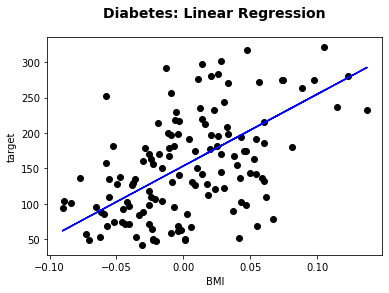

In [50]:
fig, ax = plt.subplots()
ax.set_title("Diabetes: Linear Regression",fontweight=550, fontsize=14,pad=20)
ax.set(xlabel="BMI",ylabel="target")
ax.scatter(x_test[x_test.columns[1]],y_test,c="black")
ax.plot(x_test[x_test.columns[1]],y_hat,color="blue");